DTQRW 0.9999999999964845
Gaussian 0.9999999999964034
CTQRW 0.9999804735945317


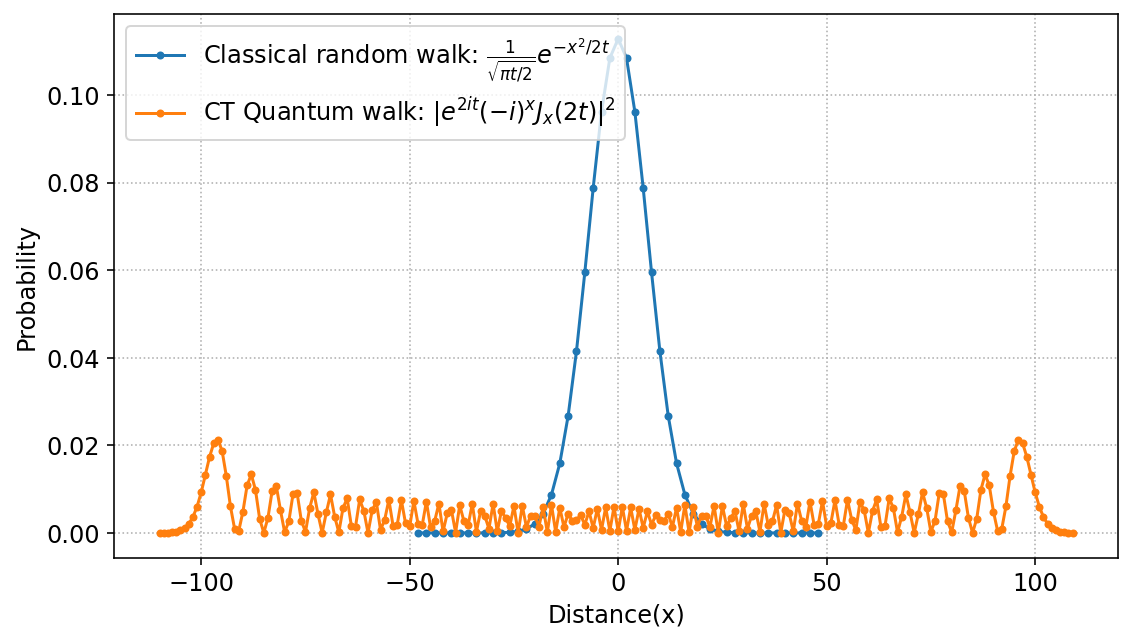

In [2]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('font', size=12)  

plt.matplotlib.rc('grid', linestyle = 'dotted')
plt.matplotlib.rc('figure', figsize = (9,5)) # (width,height) inches


# x = np.linspace(-x_range+1,x_range,100)
# print(x)
c = ['r','g','b']
i = 2
# tt = range(5, t_range, 15)
# tt = [10, 25, 45]
t = 50
# x_range = t
# t_range = t
x = range(-t-t-10,t+t+10)

n =50
from scipy.special import comb
if (n % 2) == 0:
    x_2 = np.arange(-n+2,n,2)
else:
#     x = np.linspace(-n+1,n,2)
    x_2 = np.arange(-n+1,n,2)
# print(x)
p = []
for j in x_2:
    left = (n-j)/2
    right= (n+j)/2
    psi_l= sum([comb(left-1,k)*comb(right,k)*(-1)**(left-1-k) for k in range(0,n)])
    psi_r= sum([comb(left-1,k-1)*comb(right,k)*(-1)**(left-k) for k in range(0,n)])
#     print('j=',j,', psi_l=',psi_l,', psi_r=',psi_r)
    p = p + [(psi_l**2+psi_r**2)*2**(-n)]
#     print('j=',j,'prob=', (psi_l**2+psi_r**2)*2**(-n))
# print(p)
p_sym = [sum(x)/2 for x in zip(p,p[::-1])]
print('DTQRW', sum(p_sym))

#     Gaussian
# plt.plot(x, np.exp(-np.power(x,2)/(2*t))/(np.sqrt(2*np.pi*t)),'-')
plt.plot(x_2, np.exp(-np.power(x_2,2)/(2*t))/(np.sqrt(np.pi*t/2)),'.-')
print('Gaussian', sum([np.exp(-np.power(y,2)/(2*t))/(np.sqrt(np.pi*t/2)) for y in x_2]))
#     propagator
# plt.plot(x, (np.real(np.exp(1j*np.power(x,2)/(2*t))/(np.sqrt(2*np.pi*t*1j)))),':')
# print('propagator', sum([(np.abs(np.exp(1j*np.power(y,2)/(2*t))/(np.sqrt(2*np.pi*t))))**2 for y in x]))
#     CT quantum walk
plt.plot(x, (np.abs(np.exp(2*1j*t) * np.power(-1j,x) * sp.jv(x, 2*t)))**2,'.-')
print('CTQRW', sum([(np.abs(np.exp(2*1j*t) * np.power(-1j,y) * sp.jv(y, 2*t)))**2 for y in x]))
#     DT quantum walk
# plt.plot(x_2, p_sym,'.-')

#     plt.plot(x, (np.real(np.exp(1j*np.power(x,2)/(2*t))/(np.sqrt(2*np.pi*t*1j))))**2,'-.',color=c[i])
# plt.xlim((0, x_range))
# plt.ylim((-0.5, 1.1))
plt.legend((r'Classical random walk: $\frac{1}{\sqrt{\pi t/2}}e^{-x^2/2t}$', r'CT Quantum walk: $|e^{2it}(-i)^{x} J_{x}(2t)|^2$'), loc='upper left')
# plt.legend((r'Classical random walk: $\frac{1}{\sqrt{\pi t/2}}e^{-x^2/2t}$', r'Quantum propagator: $Re(\frac{1}{\sqrt{2i \pi t}}e^{i x^2/2t})$',r'CT Quantum walk: $|e^{2it}(-i)^{x} J_{x}(2t)|^2$', r'DT Quantum walk'), loc='upper left')
plt.xlabel('Distance(x)')
plt.ylabel('Probability')
# plt.text(5, 0.12, r'Classical random walk: $\frac{1}{\sqrt{2\pi t}}e^{-x^2/2t}$')
# plt.text(5, 0.10, r'Quantum walk: $|Re(e^{2it}(-i)^{x} J_{x}(2t))|^2$')
# plt.text(5, 0.08, r'Quantum propagator: $|Re(\frac{1}{\sqrt{2i \pi t}}e^{i x^2/2t})|^2$')
plt.grid(True)
# plt.title('Probability distribution of classical/quantum random walk on an (infinite) line')
plt.savefig('walk_1d.pdf', transparent=True, dpi=400)